In this Notebook a calculation of the FORTE flux limits will be calculated, following the paper "FORTE satellite constraints
on ultra-high energy cosmic particle fluxes" by Lehtinen *et al.* (2004). This paper can be found at https://arxiv.org/pdf/astro-ph/0309656.pdf. 

In [2]:
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.stats as stats
import numpy as np
import math

In [3]:
# configure Matplotlib to use LaTeX
plt.rcParams['text.usetex'] = False

##### SENSITIVITY FUNCTION #####
The following function is called the sentitivity function and calculates the sensitivity of the FORTE satellite to UHE $\nu$ flux:

$$\lambda(\epsilon_{\nu}) = DT \langle \int_{A_{visible}} R(\theta_s, \phi_a; \epsilon_\nu)  dA \rangle_{time} \label{eq:sensitivity function} \tag{1}$$

Parameter explanations: <br>
* **D** = duty cycle or the fraction of time in trigger mode. 
* **T** = lifetime in orbit of the satellite.
* **$R(\theta_s, \phi_a; \epsilon_\nu)$** = specific aperture which we define as the trigger rate for unit monoenergetic $\nu$ flux when neutrinos interact under a unit area of ice.
* **dA** = a unit area of ice.

In [4]:
# the time when the emission from the Greenland ice sheet is visible by the satellite in days
ice_visible = 38

# the duty cycle D (in days) is estimated to be 6% of ice_visible
D = 0.06 * 38

# the lifetime (in days) is from September 1997 till December 1999
T = ((30 + 31 + 30 + 31) + 365 + (365 - 31))

print(f"The lifetime in orbit of the satellite is T = {T} days.")
print(f"The duty cycle of the satellite is D = {D} days.")

The lifetime in orbit of the satellite is T = 821 days.
The duty cycle of the satellite is D = 2.28 days.


##### APERTURE FUNCTION #####
The specific aperture R is found using the fraction of interacting neutrinos which produce field $E_{ant} > E_{th}$ at the satellite antennas:

$$R(\theta_s, \phi_a; \epsilon_\nu) = \int F(\Omega, z; \epsilon_{\nu}) [1 - F_y(\frac{E_{th}}{E_{ant}(\epsilon_{\nu}, \Omega, \theta_s, \phi_a)})]d\Omega dz \label{eq:aperture function} \tag{2}$$.

The function describes the number of interactions in ice (essentially describes how likely $\nu$s of a certain energy are to interact at a particular angle and depth):

$$\phi F(\Omega, z; \epsilon_{\nu}) d\Omega dV = N_{nuc} \sigma_{\nu N} (\epsilon_\nu) d\phi dV \label{eq:neutrino interactions in ice} \tag{3}$$.

The cumulative distribution function of y which represents the fraction of energy going into the hadronic shower produced by the neutrino interaction:

$$ F_y(y) = \int_0^y p(y′)dy′ \label{eq:fraction of engery in shower} \tag{4}$$.

Parameter explanations: <br>
* **$\Omega$** = ($\alpha_{dip}$, $\phi_s$) is the neutrino velocity direction.
* **z** = interaction depth.
* **$\epsilon_\nu$** = neutrino energy.
* **$N_{nuc}$** = is the nucleon number density.
* **$\theta_s$** = the arc distance to the shower location.
* **$\phi_a$** = azimuthal angle between shower axis and satellite.   => ($\theta_s$,$\phi_a$) = satellite position
* **$E_{th}$ [E_th]** = the threshold value for the detected field strength. 
* **$E_{ant}$** = field strength at the satellite's antenna's.
* **$\sigma_{\nu N}$** = the theoretical neutrino-nucleon interaction cross-section.
* **$d\phi$** = $\phi_e^{−\tau} d\Omega$ is the flux in solid angle element d$\Omega$ attenuated by neutrino absorption in a layer of optical thickness $\tau(\alpha_{dip}, z) = \int N_{nuc} \sigma_{\nu N} dl$.
* **$d\Omega$** = $sin\alpha_{dip}d\alpha_{dip} d\phi_s$ = the solid angle element.
* **$\alpha_{dip}$** = dip angle or the angle of $\nu$ velocity below the horizon at the interaction point.

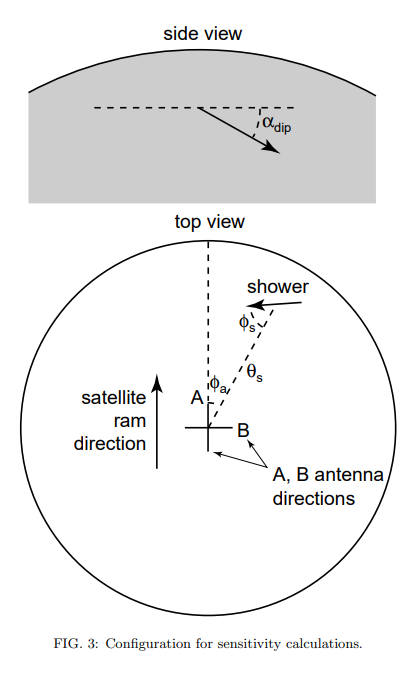

In [5]:
# the threshold field strength (in µV m^−1 MHz^−1)
E_th = 30

##### EXPECTED NUMBER OF TRIGGERS #####
The following function determines the exptected number of triggers:

$$ s = \int \lambda(\epsilon_\nu) \phi(\epsilon_\nu) \, d\epsilon_\nu \label{eq:expected number of triggers} \tag{5}$$

Parameter explanations: <br>
* **$\lambda(\epsilon_\nu)$ [lambda_E]** = the theoretical number of triggers of FORTE in its full lifetime assuming a unit monoenergetic $\nu$ flux for different energies $\epsilon$. <br> 
*($\lambda(\epsilon_\nu)$ [lambda_E] = a function that tells us how many times the FORTE satellite should detect UHE neutrinos of different energies ($\epsilon$) throughout its entire lifetime, assuming a certain level of neutrino activity. We call this function the "sensitivity" of the FORTE satellite to UHE neutrinos.)* <br>
* **$\phi(\epsilon_\nu)$ [flux_E]** = the differential $\nu$ flux (per unit area, time and solid angle). <br>
* **s** = the number of triggers (trigger = UHE $\nu$ detection).

**$\sigma_{\nu N}$** = the theoretical neutrino-nucleon interaction cross-section. In the following section results from table 1 are noted down which gives the FORTE sensitivity with $\sigma_{\nu N}$, 0.1$\sigma_{\nu N}$, and 0.01$\sigma_{\nu N}$. It also gives a sensitivity of the the energy of the neutrino's without any cross section.


In [6]:
# the lambda_E (in cm^2 s sr) is calculated in the paper and put in table 1 column 2
lambda_E = [8.0E12, 5.4E14, 5.3E15, 2.4E16, 7.1E16, 1.7E17, 3.4E17, 6.0E17, 9.5E17]

# for different neutralino-nucleon coss-sections there are different sensitivities (x*omega_nuN for x = 1, 0.1, 0.01)
lambda_E1 = [2.1E14, 5.6E15, 3.2E16, 9.7E16, 2.2E17, 4.1E17, 6.9E17, 1.0E18, 1.4E18]
lambda_E01 = [2.6E13, 6.6E14, 3.8E15, 1.2E16, 2.8E16, 5.6E16, 1.0E17, 1.7E17, 2.6E17]
lambda_E001 = [4.1E12, 7.9E13, 4.1E14, 1.3E15, 3.0E15, 6.1E15, 1.1E16, 1.9E16, 3.0E16]

# the lambda_E is calculated for different energies in log_10 scale (in GeV)
E_log = [13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0]

# the energies of the neutrino's (in GeV) is then
E = [10**x for x in E_log]

The actual number of neutrino detections in the satellite is a random process and follows a *Poisson distribution* with an expected value of **s**. <br>
If no events are detected:
$$ s \leq s_{up} = − log(\alpha) \label{eq:neutrino detections} \tag{6}$$.

Parameter explanations:
* **$s_{up}$ [s_up]**= the upper limit on s.
* **1-$\alpha$** [confidence_level]= the confidence level.


If one assumes that the spectrum is sufficiently smooth, i.e. does not have any sharp peaks (the peaks have widths at least of the order of the central energy of a peak), then we can assert that the limit on differential flux is:
$$\phi(\epsilon) \leq \frac{s_{up}}{\epsilon \lambda(\epsilon)} \label{eq:limit on differential flux} \tag{7}$$.

In [7]:
# the paper takes one uncertain event as our background noise
events = 1

# the desired confidence level is 90%
confidence_level = 0.90

# s_up follows a poison distribution which gives the following as by the paper
s_up = 3.89

In [8]:
# the formula's for the limit on differential flux (dN/dE in GeV^-1 cm^-2 s^-1 sr^-1) (7) is thus
flux_E = [s_up / (x * y) for x, y in zip(E, lambda_E)]
flux_E1 = [s_up / (x * y) for x, y in zip(E, lambda_E1)]
flux_E01 = [s_up / (x * y) for x, y in zip(E, lambda_E01)]
flux_E001 = [s_up / (x * y) for x, y in zip(E, lambda_E001)]

# now we want to get the energy-weighted differential flux (E^2 dN/dE in GeV cm^-2 s^-1 sr^-1) thus
flux_E_E2 = [x**2 * y for x, y in zip(E, flux_E)]
flux_E1_E2 = [x**2 * y for x, y in zip(E, flux_E1)]
flux_E01_E2 = [x**2 * y for x, y in zip(E, flux_E01)]
flux_E001_E2 = [x**2 * y for x, y in zip(E, flux_E001)]

# for the final plot we want the log base of the flux
flux_E_log = [math.log(x) for x in flux_E_E2]
flux_E1_log = [math.log(x) for x in flux_E1_E2]
flux_E01_log = [math.log(x) for x in flux_E01_E2]
flux_E001_log = [math.log(x) for x in flux_E001_E2]

In the paper 'Data analysis techniques for UHE acoustic astronomy' a sensitivity for the *ACoRNE* hydrophone set-up is presented. Below a table will be included with these values so that they can be plotted together with the *FORTE* values.

In [9]:
ACoRNE_flux_E_E2 = [24, 7, 7, 10, 20, 44, 103]
ACoRNE_flux_E_log = [math.log(x) for x in ACoRNE_flux_E_E2]

ACoRNE_E_log = [20.25, 20.5, 21, 21.5, 22, 22.5, 23]

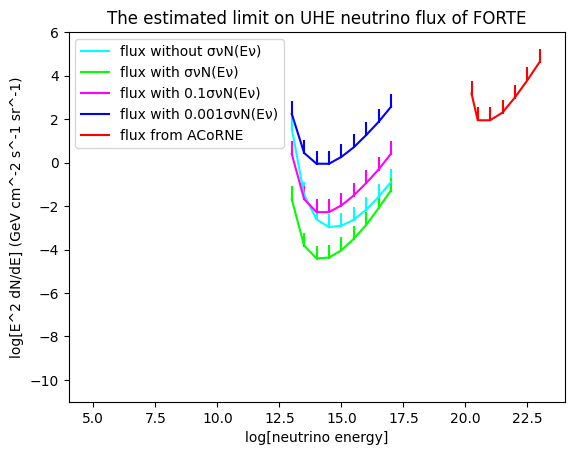

In [10]:
# plot the neutrino energies against the flux values in a graph
plt.plot(E_log, flux_E_log, label='flux without σνN(Eν)', color='cyan')
plt.plot(E_log, flux_E1_log, label='flux with σνN(Eν)', color='lime')
plt.plot(E_log, flux_E01_log, label='flux with 0.1σνN(Eν)', color='magenta')
plt.plot(E_log, flux_E001_log, label='flux with 0.001σνN(Eν)', color='blue')
plt.plot(ACoRNE_E_log, ACoRNE_flux_E_log, label='flux from ACoRNE', color='red')

# define the offset for the markers
y_offset = 0.27

# add offset to the markers
for i in range(len(E_log)):
    plt.scatter(E_log[i], flux_E_log[i] + y_offset, s=100, marker='|', color='cyan')
    plt.scatter(E_log[i], flux_E1_log[i] + y_offset, s=100, marker='|', color='lime')
    plt.scatter(E_log[i], flux_E01_log[i] + y_offset, s=100, marker='|', color='magenta')
    plt.scatter(E_log[i], flux_E001_log[i] + y_offset, s=100, marker='|', color='blue')

for i in range(len(ACoRNE_E_log)):
    plt.scatter(ACoRNE_E_log[i], ACoRNE_flux_E_log[i] + y_offset, s=100, marker='|', color='red')

# Add labels and a title
plt.xlabel('log[neutrino energy]')
plt.xlim(4, 24)
plt.ylabel('log[E^2 dN/dE] (GeV cm^-2 s^-1 sr^-1)')
plt.ylim(-11, 6)

plt.title('The estimated limit on UHE neutrino flux of FORTE')
plt.legend()

# Show the plot
plt.show()

### QUESTIONS ###
* What is a neutralino and what are the four columns in table 1. It seems like the curve that they have plotted is the one with a crossection similar to the neutrino-nucleon cross section, but then with the flux of neutralino's?
* Is the sensitivity of the acoustic detector calculable in the same way that this sensitivity is calculated?
* Can function (3) be transformed to give the number of interactions of neurtino's in water?
* Is function (4) the same in water as it is in ice?

### WHAT IS NEEDED??? ###

1. The sensitivity values of the detector. For this the following formula can be used:
$$\lambda(\epsilon_{\nu}) = DT \langle \int_{A_{visible}} R(\theta_s, \phi_a; \epsilon_\nu)  dA \rangle_{time}$$

* <span style="color: darkgreen;">**D** = duty cycle or the fraction of time in trigger mode. </span>
* <span style="color: darkgreen;">**T** = lifetime ocean.</span>
* <span style="color: darkgreen;">**$R(\theta_s, \phi_a; \epsilon_\nu)$** = specific aperture which we define as the trigger rate for unit monoenergetic $\nu$ flux when neutrinos interact in a unit area of water.</span>
* <span style="color: lime;">**dA** = a unit area of water.</span>

2. The aperture of neutrino's  in water instead of in ice:
$$R(\theta_s, \phi_a; \epsilon_\nu) = \int F(\Omega, z; \epsilon_{\nu}) [1 - F_y(\frac{E_{th}}{E_{ant}(\epsilon_{\nu}, \Omega, \theta_s, \phi_a)})]d\Omega dz$$.


* <span style="color: lime;">**$\Omega$** = ($\alpha_{dip}$, $\phi_s$) is the neutrino velocity direction.</span>
* <span style="color: lime;">**z** = interaction depth.</span>
* <span style="color: lime;">**$\epsilon_\nu$** = neutrino energy.</span>
* <span style="color: lime;">**$N_{nuc}$** = is the nucleon number density.</span>
* <span style="color: darkgreen;">**$\theta_s$** = the arc distance to the shower location.</span>
* <span style="color: darkgreen;">**$\phi_a$** = azimuthal angle between shower axis and satellite.   => ($\theta_s$,$\phi_a$) = satellite position</span>
* <span style="color: lime;">**$E_{th}$ [E_th]** = the threshold value for the detected field strength. </span>
* <span style="color: lime;">**$E_{ant}$** = field strength at the satellite's antenna's.</span>
* <span style="color: lime;">**$\sigma_{\nu N}$** = the theoretical neutrino-nucleon interaction cross-section.</span>
* <span style="color: lime;">**$d\phi$** = $\phi_e^{−\tau} d\Omega$ is the flux in solid angle element d$\Omega$ attenuated by neutrino absorption in a layer of optical thickness $\tau(\alpha_{dip}, z) = \int N_{nuc} \sigma_{\nu N} dl$.</span>
* <span style="color: darkgreen;">**$d\Omega$** = $sin\alpha_{dip}d\alpha_{dip} d\phi_s$ = the solid angle element.</span>
* <span style="color: darkgreen;">**$\alpha_{dip}$** = dip angle or the angle of $\nu$ velocity below the horizon at the interaction point.</span>

3. The number of interactions with neutrino's in water. The following formula is that of interactions in ice:

$$\phi F(\Omega, z; \epsilon_{\nu}) d\Omega dV = N_{nuc} \sigma_{\nu N} (\epsilon_\nu) d\phi dV$$.

4. The cumulative distribution function of y which represents the fraction of energy going into the hadronic shower produced by the neutrino interaction:

$$ F_y(y) = \int_0^y p(y′)dy′$$.

### HOW TO CALCULATE APERTURE ###
The formula for the aperture of a neutrino detector can be quite complex and depends on various factors, including the detector's geometry, detection mechanism, energy range, and location. The aperture is essentially a measure of the effective area over which the detector can detect neutrino interactions as a function of the incoming neutrino direction and energy.

In general terms, the formula for the aperture (A) of a neutrino detector can be expressed as:

$$A(Eν, θ, φ) = ∫∫ A(θ, φ) * P(Eν, θ, φ) * dΩ * dEν$$

Where:

* A(Eν, θ, φ) is the aperture as a function of neutrino energy (Eν) and the polar angle (θ) and azimuthal angle (φ) of the incoming neutrinos.
* A(θ, φ) is the effective area of the detector as a function of the angles θ and φ.
* P(Eν, θ, φ) is the probability of detecting a neutrino with energy Eν coming from the direction specified by θ and φ.
* dΩ is an element of solid angle, representing a small portion of the sky.
* dEν is an element of neutrino energy.

This integral sums up the contributions to the detector's effective area over different energies and directions. The actual form of A(θ, φ), P(Eν, θ, φ), and the limits of integration depend on the specific detector design and the physics of neutrino interactions.

In practice, calculating the aperture can be a complex task that involves detailed simulations and modeling of the detector's response to neutrinos of different energies and directions. Scientists use these calculations to assess the detector's sensitivity to various neutrino sources and to optimize the design and placement of detectors for specific experiments.



Calculating the aperture of a neutrino detector typically requires knowledge of the detector's design, characteristics, and expected performance. While it is possible to estimate or calculate the expected aperture based on design specifications and theoretical models, doing so before the detector is operational may involve a degree of uncertainty.

Here are some steps involved in estimating or calculating the aperture of a neutrino detector:

1. Detector Design: Understand the detector's design, including its size, geometry, material properties, and detection mechanism (e.g., Cherenkov radiation, scintillation, radio antennas, etc.).
2. Neutrino Interaction Cross-Sections: Utilize theoretical models and known neutrino interaction cross-sections to estimate the probability of neutrino interactions within the detector material.
3. Energy Response: Characterize the detector's response to neutrinos of different energies. This involves understanding the energy range over which the detector is sensitive and how the response varies with energy.
4. Directional Response: Consider the detector's directional sensitivity by assessing how it responds to neutrinos arriving from different angles (polar and azimuthal angles).
5. Simulation and Modeling: Use simulation tools or computer models to simulate the interactions of neutrinos with the detector and calculate the expected event rates for various neutrino sources (e.g., astrophysical neutrinos, atmospheric neutrinos, etc.).
6. Integral Calculation: Integrate the expected event rates over the energy and directional space to compute the aperture as described in the previous answer.
7. Uncertainty Analysis: Assess the uncertainties in the aperture calculation, including those arising from theoretical models, detector simulations, and other factors.
8. Optimization: Adjust the detector's design parameters if necessary to optimize its sensitivity to specific neutrino sources or energy ranges.

Keep in mind that the accuracy of the calculated aperture will depend on the accuracy of the input data and the validity of the underlying models. It's common for detectors to undergo refinement and calibration after they become operational to better determine their actual aperture and sensitivity.

In summary, while it is possible to estimate or calculate the aperture of a neutrino detector before it becomes operational, these estimates are subject to uncertainties and should be refined based on experimental data once the detector is in use.